# Leopard Real Estate - Price Predictor

In [65]:
import pandas as pd

In [66]:
housing = pd.read_csv("Data.csv")

In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4    NOX     506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [68]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [69]:
housing[' NOX'].value_counts()

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385     1
0.389     1
0.435     1
Name:  NOX, Length: 81, dtype: int64

In [70]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284703,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704447,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [71]:
%matplotlib inline

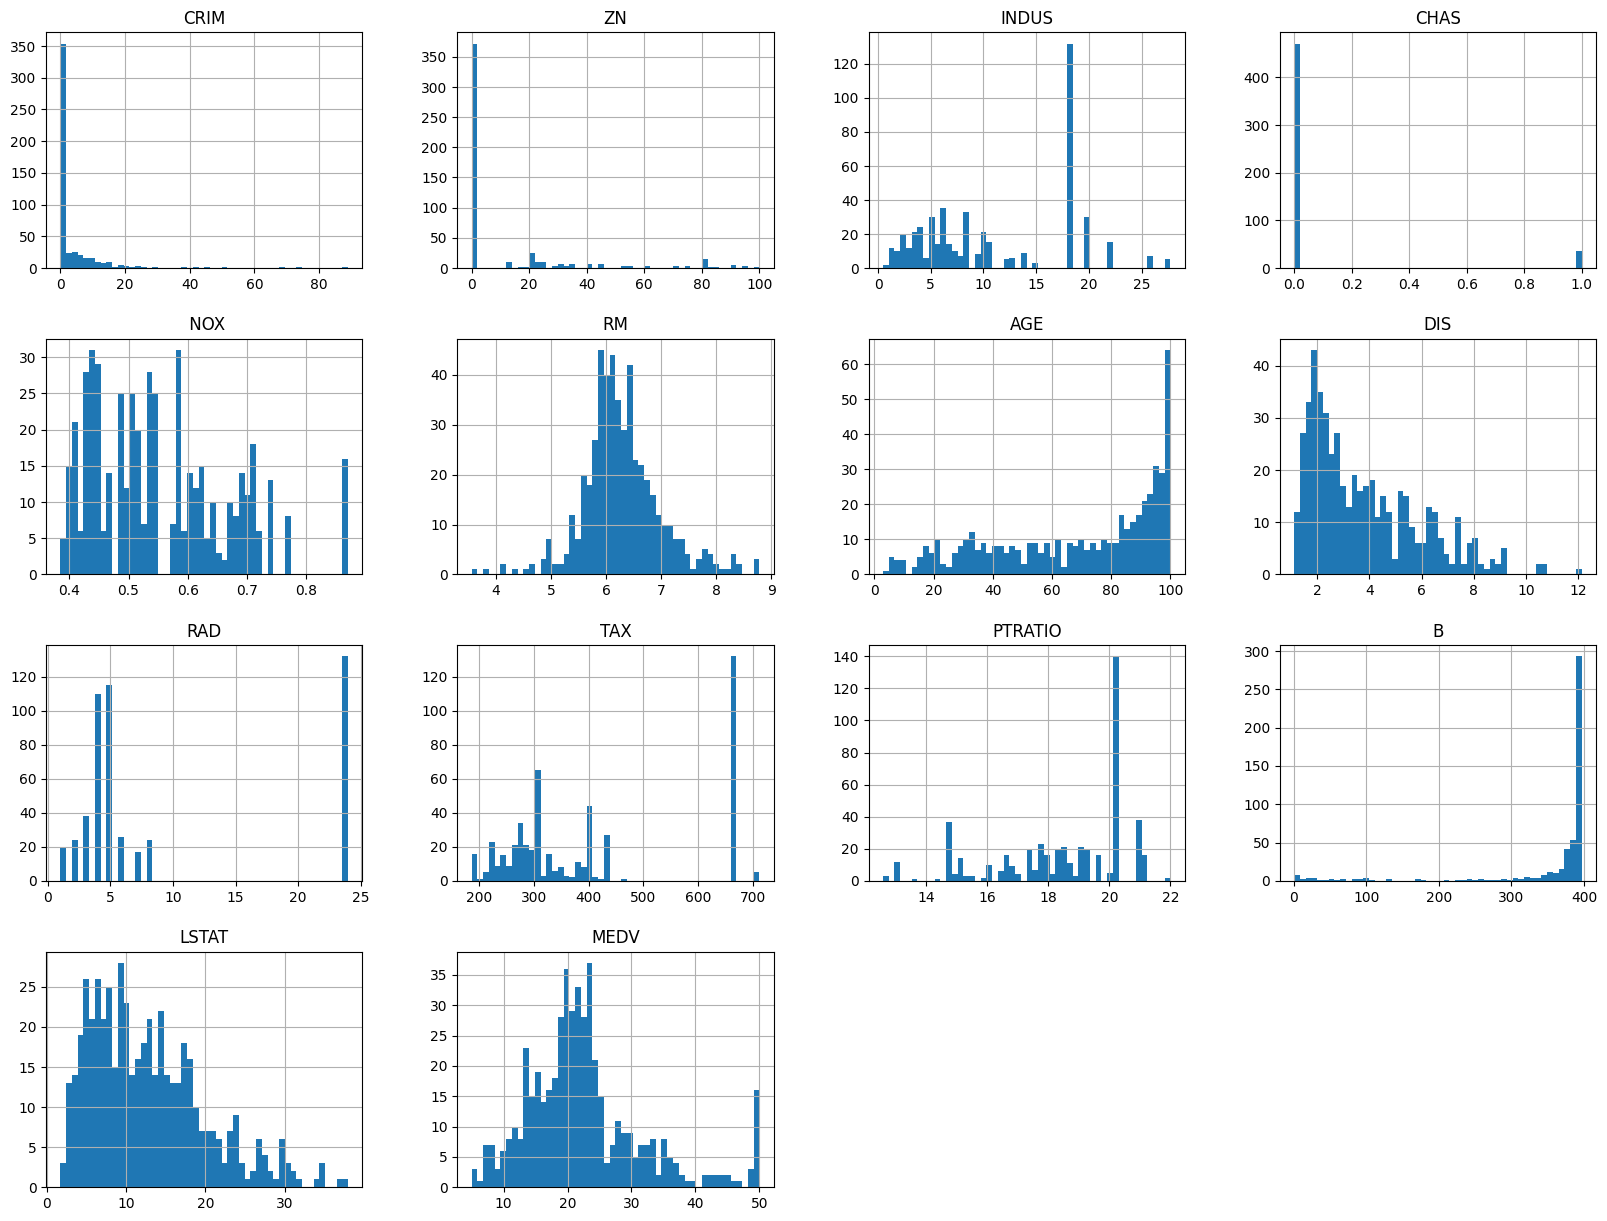

In [72]:
import matplotlib.pyplot as pit
housing.hist(bins=50,figsize=(20,15))
pit.show()

# Train-Test Spliting

In [73]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) # for setting the values of random data
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [74]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [75]:
#you can do this through sklearn also
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set : 404
Rows in test set: 102



In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [77]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [78]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [79]:
95/7

13.571428571428571

In [80]:
376/28

#These values are nearly same

13.428571428571429

In [81]:
housing = strat_train_set.copy()

LOOKING FOR COORELATION

In [82]:
corr_matrix = housing.corr()

In [83]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679234
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
 NOX      -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

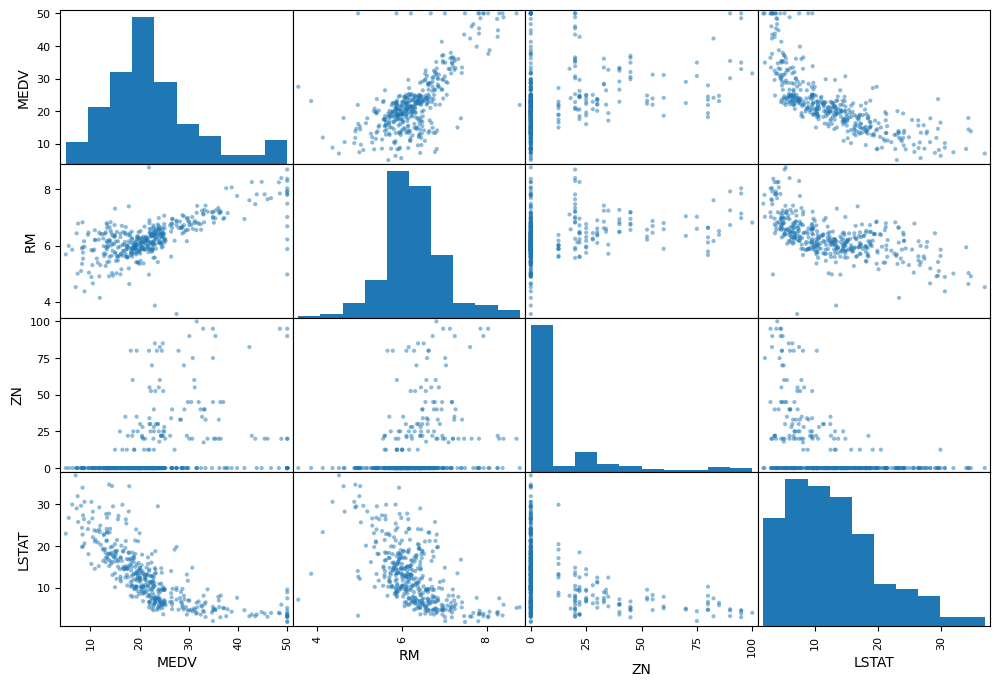

In [84]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

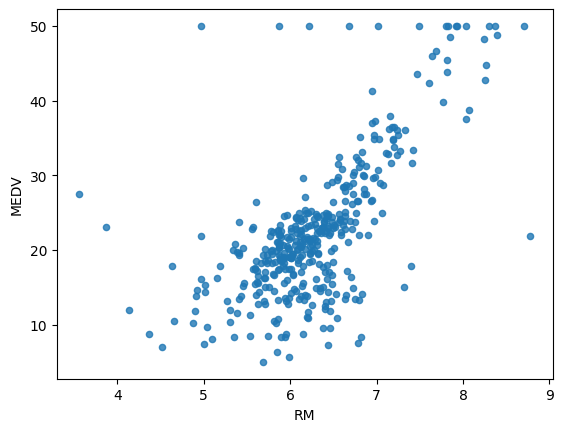

In [85]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

TRYING OUT ATTRIBUTE COMBINATIONS

In [86]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [87]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [88]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679234
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
 NOX      -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524406
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

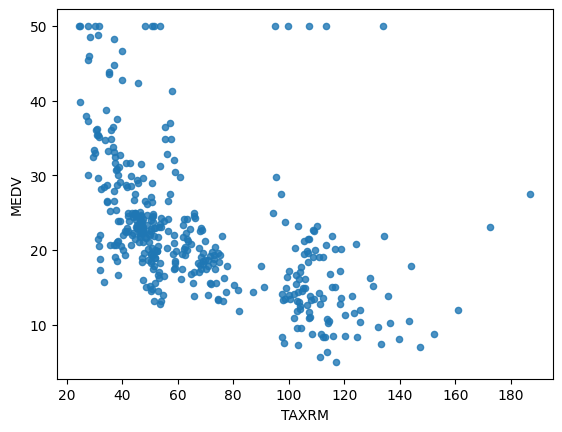

In [89]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [90]:
housing = strat_test_set.drop("MEDV",axis = 1)
housing_labels = strat_test_set["MEDV"].copy()

MISSING ATTRIBUTES

In [91]:
#To take care of missing attributes , you have three options
#   1.Get rid of the missing data points
#   2.Get rid of the whole attribute
#   3.Set the value to some value(0,mean or median)

In [92]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape
#Note that the original housing dataframe will remain unchanged

(100, 13)

In [93]:
housing.drop("RM",axis=1).shape #option 2
# Note that there is no RM column and the original housing dataframe will remain unchanged

(102, 12)

In [94]:
median = housing["RM"].median()
median

6.176

In [95]:
housing["RM"].fillna(median) #option 3
# Note that there is no RM column and the original housing dataframe will remain unchanged

342    6.540
379    6.223
223    6.618
219    6.373
48     5.399
       ...  
88     7.007
466    5.952
52     6.511
121    6.004
218    5.951
Name: RM, Length: 102, dtype: float64

In [96]:
housing.shape

(102, 13)

In [97]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.30327,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.66700,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.13800,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.92825,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.17600,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.53850,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.72500,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [98]:
#we already have a class in sklearn for this
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [99]:
#calculations by imputer
#we have filled the missing values with median of other values
imputer.statistics_

array([1.76150e-01, 0.00000e+00, 7.76000e+00, 0.00000e+00, 5.15000e-01,
       6.17600e+00, 7.11000e+01, 3.42295e+00, 5.00000e+00, 3.07000e+02,
       1.91500e+01, 3.93740e+02, 1.05650e+01])

In [100]:
x = imputer.transform(housing)

In [101]:
housing_tr = pd.DataFrame( x, columns = housing.columns)

In [102]:
#housing with new values
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.300775,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.660601,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.939250,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.531250,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


SCIKIT-LEARN DESIGN

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer . It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.
2. Transformers - Transform method takes input and returns output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor. fit() and predic() are two common functions. It also gives score() function which will evaluate the predictions.

FEATURE SCALING

Primarily , two types of feature scaling methods :
1. Min-max scaling(Normalization)
    value = (value - min) / (max - min)
    Sklearn provides a class called MinMax for this

2. Standardization 
    value = (value - mean)/ std
    Sklearn provides a class called Standard Scaler for this

CREATING A PIPELINE

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scaler',StandardScaler())
])

In [104]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [105]:
housing_num_tr.shape

(102, 13)

SELECTING A DESIRED MODEL FOR LEAPORD REAL ESTATES

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [107]:
some_data = housing.iloc[:5]

In [108]:
some_labels = housing_labels.iloc[:5]

In [109]:
prepared_data = my_pipeline.transform(some_data)

In [110]:
model.predict(prepared_data)

array([20.577, 10.377, 27.849, 23.21 , 15.569])

In [111]:
list(some_labels)

[16.5, 10.2, 30.1, 23.0, 14.4]

EVALUATING THE MODEL

In [112]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

mse = mean_squared_error( housing_labels , housing_predictions ) 
rmse = np.sqrt(mse) # root of mean square error

In [113]:
rmse

1.6765326847804842

In [114]:
#output rmse =  is very less then our array so error is high we can't afford high error so we will build a decision tree . We convert our linear regression model into decision tree model which is more precise

In [115]:
# rmse = 3. 58 means overfitting

USING BETTER EVALUATION TECHNIQUE - CROSS VALIDATION

In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr , housing_labels , scoring="neg_mean_squared_error",cv=10) 
rmse_scores = np.sqrt(-scores)
#In cross validation greater is better 

In [117]:
rmse_scores

array([4.24677619, 4.13004888, 4.8609866 , 4.91991784, 2.93262616,
       5.32698183, 5.31527239, 4.55517889, 3.40021355, 4.0995449 ])

In [118]:
#function for mean and median
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

In [119]:
print_scores(rmse_scores)

Scores :  [4.24677619 4.13004888 4.8609866  4.91991784 2.93262616 5.32698183
 5.31527239 4.55517889 3.40021355 4.0995449 ]
Mean :  4.378754723115474
Standard Deviation :  0.7442306279112662


TESTING THE MODEL ON TEST DATA

In [120]:
import sklearn
from sklearn.model_selection import train_test_split
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

In [121]:
final_rmse

1.6765326847804842

In [ ]:
# Owr answer of model is very good because rmse is less.
# and best model is Random Forest Regression in our case .